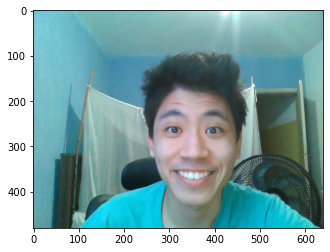

In [27]:
import numpy as np
import cv2
from matplotlib import pyplot
from tensorflow.keras.models import load_model
from mtcnn.mtcnn import MTCNN
path = r"C:/Users/KinWah/BACKUP_29_08/MASK_TCC/"

#%matplotlib inline # if you are running this code in jupyter notebook
detector = MTCNN()
model = load_model(path + "detector.h5")

size = (160, 160)
img = cv2.imread('mariana2.jpg') # reads image 'opencv-logo.png' as grayscale
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pyplot.imshow(RGB_img)
pyplot.show()

frame = img
labels = []
faces = detector.detect_faces(frame)


In [28]:
for face in faces:

        x1, y1, w, h = face['box']
        # bug fix
        # #x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + w, y1 + h

        roi = frame[y1:y2, x1:x2]
        roi = cv2.resize(roi,size)

[[1.000000e+00 4.821622e-08]]


In [21]:
people = 0
if np.sum([roi])!=0:
    roi = (roi.astype('float')/255.0)
    roi = np.reshape(roi, [1,160,160,3])

    # PREDIÇÃO
    pred = model.predict([[roi]])

    print(pred)
    pred = pred[0] ## pegando o vetor interno da classificação

    if pred[0] >= pred[1]:
        label = 'NO MASK'
        color = (0,0,255)
        people = people + 1


    else:
        label = 'MASK'
        color = (0,255,0)

    #label_position = (x1-100, y1+250)
    label_position = (x1, y1)
    cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
    cv2.putText(frame,label, label_position, cv2.FONT_HERSHEY_SIMPLEX,.6,color,2)
    
cv2.imshow('DETECTOR DE MASCARA', frame)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.00377778 0.99622214]]


In [22]:
cv2.imshow('DETECTOR DE MASCARA', frame)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

